In [634]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  roc_curve, auc, silhouette_score, recall_score, precision_score, confusion_matrix, accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report

In [769]:
df = pd.read_csv('../Data/bike_buyers.csv')

In [770]:
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


In [771]:
df.dtypes

ID                    int64
Marital Status       object
Gender               object
Income              float64
Children            float64
Education            object
Occupation           object
Home Owner           object
Cars                float64
Commute Distance     object
Region               object
Age                 float64
Purchased Bike       object
dtype: object

In [772]:
df.shape

(1000, 13)

In [773]:
len(df.ID.unique())

1000

In [774]:
df['Purchased Bike'] = df['Purchased Bike'].replace({'No': 0, 'Yes': 1})

In [775]:
df_index = df[['ID', 'Purchased Bike']]
df = df.drop(['ID'], axis = 1)

<AxesSubplot:>

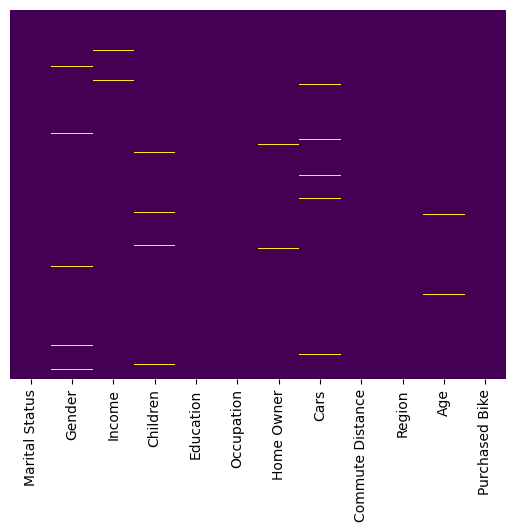

In [776]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [777]:
df.isna().sum().sort_values()

Education            0
Occupation           0
Commute Distance     0
Region               0
Purchased Bike       0
Home Owner           4
Income               6
Marital Status       7
Children             8
Age                  8
Cars                 9
Gender              11
dtype: int64

### Limpieza de datos

In [778]:
numericas= df.select_dtypes(include=['float64', 'int'])

In [779]:
numericas.describe()

,Income,Children,Cars,Age,Purchased Bike
count,994.000000,992.000000,991.000000,992.000000,1000.000000
mean,56267.605634,1.910282,1.455096,44.181452,0.481000
std,31067.817462,1.626910,1.121755,11.362007,0.499889
min,10000.000000,0.000000,0.000000,25.000000,0.000000
25%,30000.000000,0.000000,1.000000,35.000000,0.000000
50%,60000.000000,2.000000,1.000000,43.000000,0.000000
75%,70000.000000,3.000000,2.000000,52.000000,1.000000
max,170000.000000,5.000000,4.000000,89.000000,1.000000


In [780]:
for column in numericas:
    df[column] = df[column].fillna(df[column].mean())

In [781]:
categoricas = df.select_dtypes(include=['object','category'])

In [782]:
categoricas.describe()

,Marital Status,Gender,Education,Occupation,Home Owner,Commute Distance,Region
count,993,989,1000,1000,996,1000,1000
unique,2,2,5,5,2,5,3
top,Married,Male,Bachelors,Professional,Yes,0-1 Miles,North America
freq,535,500,306,276,682,366,508


In [783]:
for column in categoricas:
    df[column] = df[column].fillna(df[column].mode()[0]) 

In [818]:
df['Commute Distance'] = df['Commute Distance'].replace({'0-1 Miles': 0,'1-2 Miles': 1, '10+ Miles': 10, '2-5 Miles': 2, '5-10 Miles': 5})

### Calcular la correlación entre las variables numéricas de los clientes que compran bicicletas.

In [819]:
numerics= df.select_dtypes(include=['float64', 'int'])
numerics = numerics[numerics['Purchased Bike'] == 1]

In [820]:
numerics.head()

,Income,Children,Cars,Commute Distance,Age,Purchased Bike
3,70000.000000,0.0,1.0,5,41.000000,1
4,30000.000000,0.0,0.0,0,36.000000,1
6,160000.000000,2.0,4.0,0,33.000000,1
7,40000.000000,1.0,0.0,0,43.000000,1
9,56267.605634,2.0,1.0,0,44.181452,1


<AxesSubplot:>

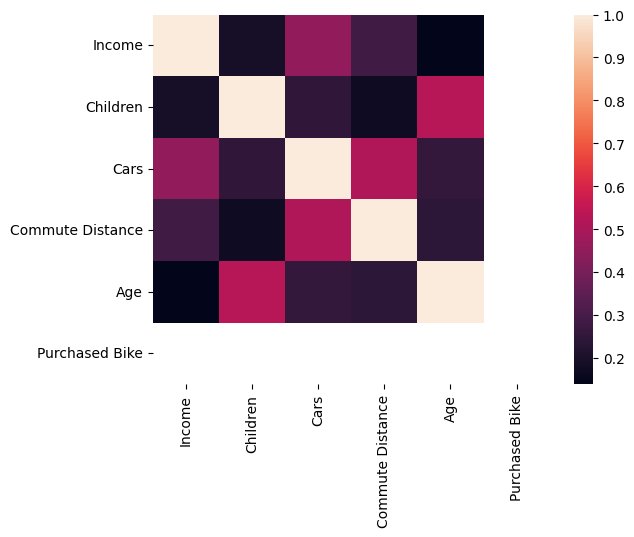

In [821]:
sns.heatmap(numerics.corr())

### ¿Qué regiones presentan el mayor número de compra “Yes” y “No”?

<AxesSubplot:xlabel='Region', ylabel='count'>

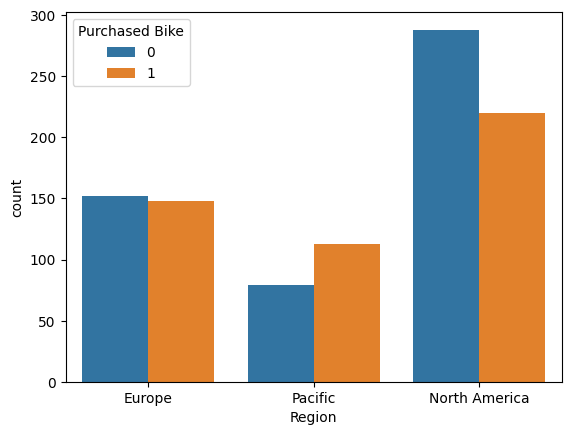

In [822]:
sns.countplot(x='Region', hue='Purchased Bike',data=df,)

### Analizar las variables Gender, Occupation y Children.

[Text(0.5, 1.0, 'Numero de personas de cada genero por ocupacion')]

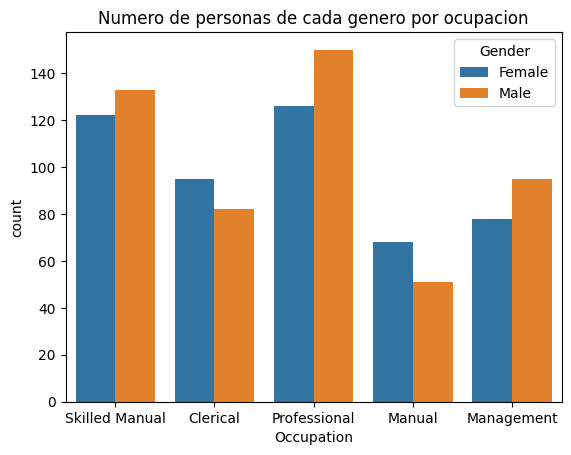

In [823]:
sns.countplot(x='Occupation',hue='Gender',data=df).set(title='Numero de personas de cada genero por ocupacion')

[Text(0.5, 1.0, 'Numero de hijos por genero')]

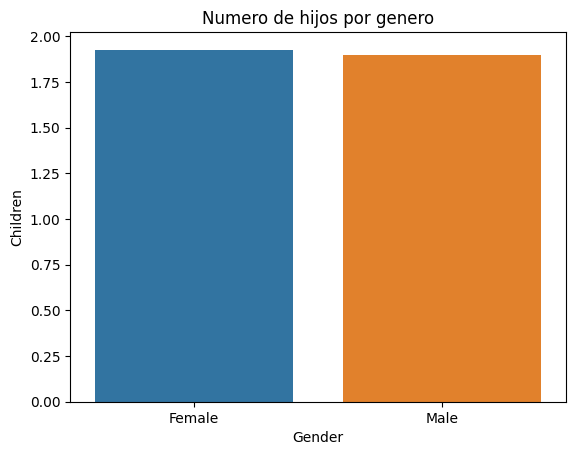

In [824]:
sns.barplot(x='Gender',y='Children',data=df, errorbar=('ci', 0)).set(title='Numero de hijos por genero')

[Text(0.5, 1.0, 'Numero de hijos por ocupacion')]

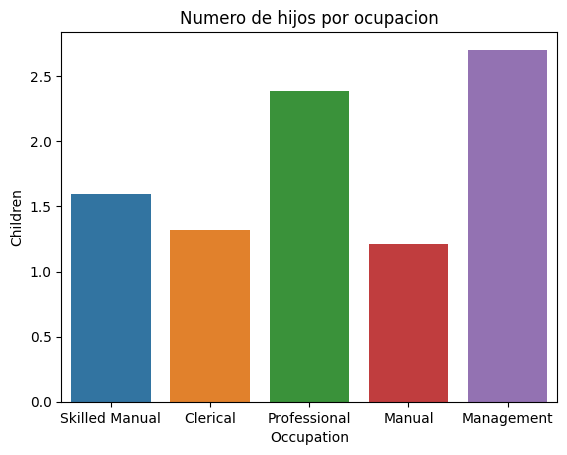

In [825]:
sns.barplot(x='Occupation',y='Children',data=df, errorbar=('ci', 0)).set(title='Numero de hijos por ocupacion')

### Regresion logistica

In [826]:
X = df.drop(['Purchased Bike'], axis = 1)

In [827]:
y= df['Purchased Bike']

In [828]:
categoricas = X.select_dtypes(include=('object','category')).columns.tolist()
numericas = X.select_dtypes(include=('int64','float64')).columns.tolist()

In [829]:
variables_str  = X.select_dtypes(include = ['object','category']).columns.tolist()
for var in variables_str:
    print('N de ', var,':',df[var].nunique())

N de  Marital Status : 2
N de  Gender : 2
N de  Education : 5
N de  Occupation : 5
N de  Home Owner : 2
N de  Region : 3


In [830]:
categorical=pd.get_dummies(X[categoricas],columns=categoricas,drop_first=True)
categorical

,Marital Status_Single,Gender_Male,Education_Graduate Degree,Education_High School,Education_Partial College,Education_Partial High School,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,Home Owner_Yes,Region_North America,Region_Pacific
0,0,0,0,0,0,0,0,0,0,1,1,0,0
1,0,1,0,0,1,0,0,0,0,0,1,0,0
2,0,1,0,0,1,0,0,0,1,0,0,0,0
3,1,1,0,0,0,0,0,0,1,0,1,0,1
4,1,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,0,1,0,0,0,0,1,0,1,1,0
996,1,1,1,0,0,0,0,0,1,0,1,1,0
997,0,1,0,0,0,0,0,0,0,1,1,1,0
998,1,1,0,0,0,0,1,0,0,0,0,1,0


In [831]:
numericas
numerical = X[numericas]

In [832]:
preprocessed_data = pd.merge(numerical, categorical, left_index=True, right_index=True)
preprocessed_data.head()

,Income,Children,Cars,Commute Distance,Age,Marital Status_Single,Gender_Male,Education_Graduate Degree,Education_High School,Education_Partial College,Education_Partial High School,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,Home Owner_Yes,Region_North America,Region_Pacific
0,40000.0,1.0,0.0,0,42.0,0,0,0,0,0,0,0,0,0,1,1,0,0
1,30000.0,3.0,1.0,0,43.0,0,1,0,0,1,0,0,0,0,0,1,0,0
2,80000.0,5.0,2.0,2,60.0,0,1,0,0,1,0,0,0,1,0,0,0,0
3,70000.0,0.0,1.0,5,41.0,1,1,0,0,0,0,0,0,1,0,1,0,1
4,30000.0,0.0,0.0,0,36.0,1,1,0,0,0,0,0,0,0,0,0,0,0


In [833]:
X_train, X_test, y_train, y_test = train_test_split(preprocessed_data,y,train_size = 0.7,random_state = 20,stratify = y)

In [834]:
logmodel = LogisticRegression(solver='lbfgs', max_iter=1000)

In [835]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [836]:
y_pred_train=logmodel.predict(X_train)
y_pred_test=logmodel.predict(X_test)

(array([10., 18., 16., 34., 46., 73., 63., 31.,  6.,  3.]),
 array([0.15527165, 0.21775625, 0.28024086, 0.34272546, 0.40521006,
        0.46769466, 0.53017926, 0.59266386, 0.65514847, 0.71763307,
        0.78011767]),
 <BarContainer object of 10 artists>)

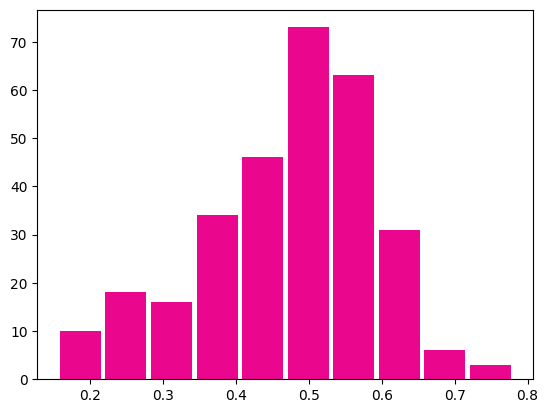

In [837]:
prob_test_rl = logmodel.predict_proba(X_test)[:,1]
plt.hist(prob_test_rl, color = '#ea068d', rwidth=0.9)

(array([ 31.,  29.,  46.,  85., 125., 175., 131.,  47.,  22.,   9.]),
 array([0.17794665, 0.23890912, 0.29987159, 0.36083406, 0.42179653,
        0.482759  , 0.54372147, 0.60468394, 0.66564641, 0.72660888,
        0.78757135]),
 <BarContainer object of 10 artists>)

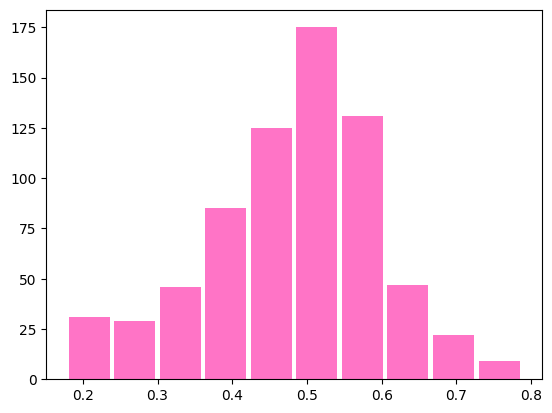

In [838]:
prob_train_rl = logmodel.predict_proba(X_train)[:,1]
plt.hist(prob_train_rl, color = '#ff74c6', rwidth=0.9)

### Evaluacion del modelo

In [839]:
predictions = logmodel.predict(X_test)

In [840]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.63      0.65      0.64       156
           1       0.61      0.59      0.60       144

    accuracy                           0.62       300
   macro avg       0.62      0.62      0.62       300
weighted avg       0.62      0.62      0.62       300



Text(0.5, 23.52222222222222, 'Predicted')

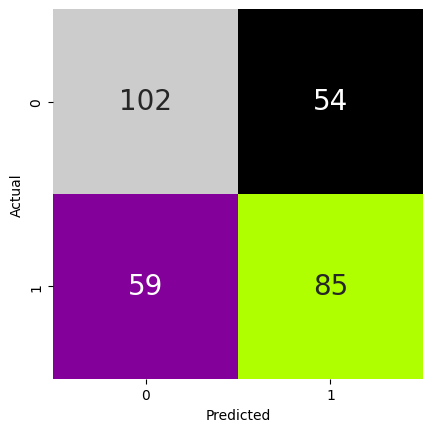

In [841]:
mat_logreg = confusion_matrix(y_test, y_pred_test)
sns.heatmap(mat_logreg, annot=True, fmt='d',cmap='nipy_spectral', square=True, cbar=False, annot_kws = {'size' : 20})
plt.ylabel('Actual')
plt.xlabel('Predicted')

### Curva ROC

In [842]:
auc_rl = metrics.roc_auc_score(y_test, prob_test_rl)
auc_rl

0.6430956196581197

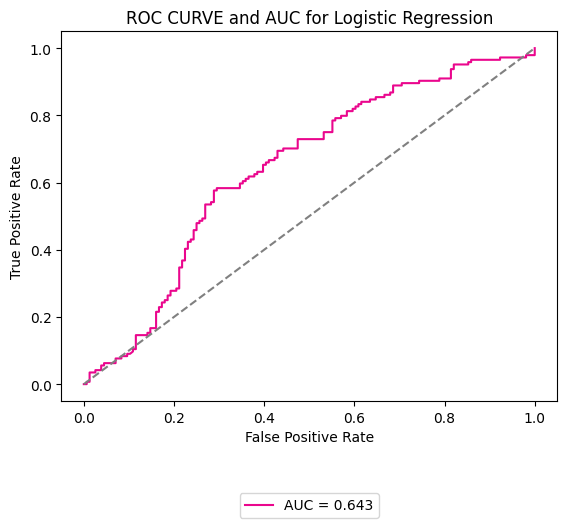

In [843]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, prob_test_rl)
plt.plot(fpr, tpr, label= "AUC = " + str(auc_rl.round(3)), color='#ea068d')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC CURVE and AUC for Logistic Regression')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.legend(bbox_to_anchor=(.5,-0.23), loc='upper center')

### Resultado del modelo

In [844]:
probabilidad = list(prob_test_rl.round(3))
probabilidad_train = list(prob_train_rl.round(3))
X_test['PROBABILIDAD'] = probabilidad
X_train['PROBABILIDAD'] = probabilidad_train

In [845]:
X_train = X_train.sort_values(['PROBABILIDAD'], ascending=False)
X_test = X_test.sort_values(['PROBABILIDAD'], ascending=False)

In [846]:
X_train['GRUPOS'] = pd.qcut(X_train['PROBABILIDAD'], 10, labels=[10,9,8,7,6,5,4,3,2,1])

In [847]:
X_test['GRUPOS'] = pd.qcut(X_test['PROBABILIDAD'], 10, labels=[10,9,8,7,6,5,4,3,2,1])

In [848]:
final_train = X_train.merge(df_index, how='left', left_index=True, right_index=True, sort=False)
final_test = X_test.merge(df_index, how='left', left_index=True, right_index=True, sort=False)

In [849]:
resumen_train = final_train.groupby('GRUPOS')['PROBABILIDAD'].agg(['count','min','max','mean']).reset_index().sort_values(['GRUPOS'], ascending=False)
ventas_train = final_train.groupby('GRUPOS')['Purchased Bike'].agg(['sum', 'min', 'max', 'mean']).reset_index().sort_values(['GRUPOS'], ascending=False)
resumen_train = pd.merge(resumen_train, ventas_train[['sum','mean']], left_index=True, right_index=True)
resumen_train.rename(columns={'count' : 'Leads', 'min' : 'Min', 'max': 'Max', 'sum': 'Préstamo', 'mean_x' : '%RR (Estimado)', 'mean_y' : '%RR (Real)'}, inplace = True)
resumen_train

,GRUPOS,Leads,Min,Max,%RR (Estimado),Préstamo,%RR (Real)
9,1,69,0.614,0.788,0.666362,43,0.623188
8,2,70,0.573,0.613,0.588900,41,0.585714
7,3,70,0.546,0.572,0.558614,44,0.628571
6,4,69,0.518,0.544,0.531507,41,0.594203
5,5,68,0.495,0.517,0.506074,35,0.514706
4,6,71,0.469,0.494,0.482324,29,0.408451
3,7,72,0.431,0.468,0.451667,36,0.500000
2,8,71,0.386,0.430,0.411296,24,0.338028
1,9,69,0.306,0.384,0.351942,28,0.405797
0,10,71,0.178,0.305,0.251493,16,0.225352


In [850]:
resumen_test = final_test.groupby('GRUPOS')['PROBABILIDAD'].agg(['count','min','max','mean']).reset_index().sort_values(['GRUPOS'], ascending=False)
ventas_test = final_test.groupby('GRUPOS')['Purchased Bike'].agg(['sum', 'min', 'max', 'mean']).reset_index().sort_values(['GRUPOS'], ascending=False)
resumen_test = pd.merge(resumen_test, ventas_test[['sum','mean']], left_index=True, right_index=True)
resumen_test.rename(columns={'count' : 'Leads', 'min' : 'Min', 'max': 'Max', 'sum': 'Préstamo', 'mean_x' : '%RR (Estimado)', 'mean_y' : '%RR (Real)'}, inplace = True)
resumen_test

,GRUPOS,Leads,Min,Max,%RR (Estimado),Préstamo,%RR (Real)
9,1,29,0.616,0.780,0.655931,13,0.448276
8,2,31,0.572,0.615,0.591129,20,0.645161
7,3,30,0.540,0.571,0.555933,22,0.733333
6,4,27,0.517,0.539,0.529444,20,0.740741
5,5,33,0.492,0.516,0.505030,15,0.454545
4,6,30,0.466,0.490,0.477967,15,0.500000
3,7,29,0.427,0.465,0.448414,12,0.413793
2,8,30,0.373,0.426,0.400667,12,0.400000
1,9,31,0.302,0.372,0.340839,8,0.258065
0,10,30,0.155,0.290,0.234700,7,0.233333
